In [1]:
%%capture
%run ./import-data.ipynb
%run ./normalisation.ipynb

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
stars.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
dtype: object

##  Plot eigenvalues

In [4]:
e_values, e_vectors = np.linalg.eig(C)
e_values, e_vectors

(array([4.13427769, 2.14472493, 0.80939419, 0.45745038, 0.25824135,
        0.15988824, 0.02044308, 0.01602715]),
 array([[ 0.35966215,  0.36188489,  0.01325276,  0.29225602,  0.74434976,
          0.01841197,  0.31459003, -0.02703314],
        [ 0.21234796,  0.4302135 , -0.4364344 , -0.75678826,  0.01895864,
          0.04607132, -0.06416928, -0.00464184],
        [-0.41613654, -0.31813967, -0.09173293, -0.30304693,  0.14615196,
          0.05228488,  0.77303907, -0.06067659],
        [-0.40148661, -0.30577008, -0.08346561, -0.17789768,  0.6436107 ,
         -0.02074329, -0.53965092,  0.02847703],
        [-0.34562563,  0.24791766, -0.57038435,  0.33242329, -0.07333901,
         -0.60719734,  0.02631342, -0.09206839],
        [-0.38632121,  0.31722697, -0.23420002,  0.25773213, -0.06594445,
          0.75165549, -0.06107319, -0.23618403],
        [ 0.3702155 , -0.41102233, -0.27334335,  0.03798298,  0.00344466,
          0.01531573, -0.05065127, -0.78423838],
        [ 0.2922836 , -0.

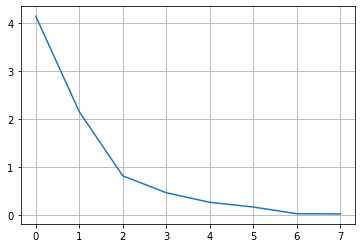

In [5]:
plt.grid()
plt.plot(e_values)
plt.savefig('images/eigen.png')

## PCA

In [6]:
max_components = len(stars.columns)
max_components

8

#### Plot % variance explained

In [7]:
es = PCA(n_components = max_components)
es.fit(X_scaled) # Fit the model with X without applying the dimensionality reduction on X

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
var = es.explained_variance_ratio_
var = np.cumsum(np.round(es.explained_variance_ratio_, decimals=3) * 100)

print('eigen values: ' + str(es.explained_variance_))
print('eigen values ratio: ' + str(es.explained_variance_ratio_))
print('percentage ratio: ' + str(var))

eigen values: [4.13427769 2.14472493 0.80939419 0.45745038 0.25824135 0.15988824
 0.02044308 0.01602715]
eigen values ratio: [0.51675584 0.26807564 0.10116862 0.0571781  0.03227836 0.01998491
 0.00255524 0.00200328]
percentage ratio: [ 51.7  78.5  88.6  94.3  97.5  99.5  99.8 100. ]


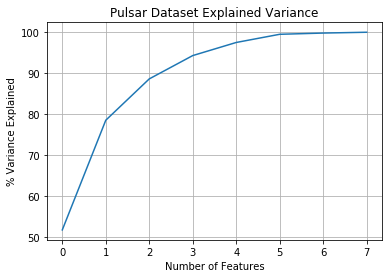

In [9]:
plt.figure()
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('Pulsar Dataset Explained Variance')
plt.plot(var)
plt.grid()
plt.savefig('images/eigen-percent.png')
plt.show()

## PCA transform

In [10]:
pca = PCA(n_components=max_components)
X_pca = pca.fit_transform(X_scaled)
print("shape of X_pca", X_pca.shape)

shape of X_pca (17898, 8)


#### covariance

In [11]:
C = np.cov(X_pca.T)
np.round(C, decimals=10)

array([[ 4.13427769,  0.        , -0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        ],
       [ 0.        ,  2.14472493,  0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.        ],
       [-0.        ,  0.        ,  0.80939419, -0.        ,  0.        ,
         0.        , -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ,  0.45745038,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ,  0.25824135,
         0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.15988824, -0.        ,  0.        ],
       [ 0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.        ,  0.02044308,  0.        ],
       [-0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.01602715]])

## Plot projections

In [12]:
pca_df = pd.DataFrame(data=X_pca, columns=['principal_component_' + str(i+1) for i in range(max_components)])
pca_df['target'] = target_df
pca_df.head(2)

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,target
0,-1.278849,-1.273133,0.016213,0.662102,0.577362,0.100457,0.017268,0.004551,0
1,-1.020553,-0.201162,0.670478,1.605779,-0.390326,0.073633,0.022209,-0.112661,0


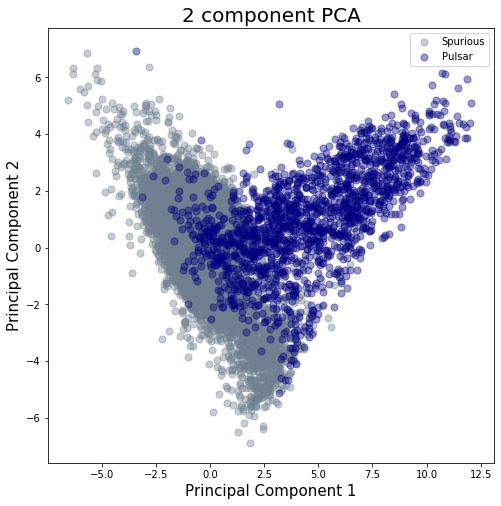

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colours = ['slategrey', 'navy']

for target, colour in zip(targets, colours):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal_component_1'], 
               pca_df.loc[indicesToKeep, 'principal_component_2'], 
               c = colour, 
               s = 50, 
               alpha = .4)

ax.legend(['Spurious', 'Pulsar'])
plt.savefig('images/2component-projection.png')

In [14]:
from mpl_toolkits.mplot3d import Axes3D

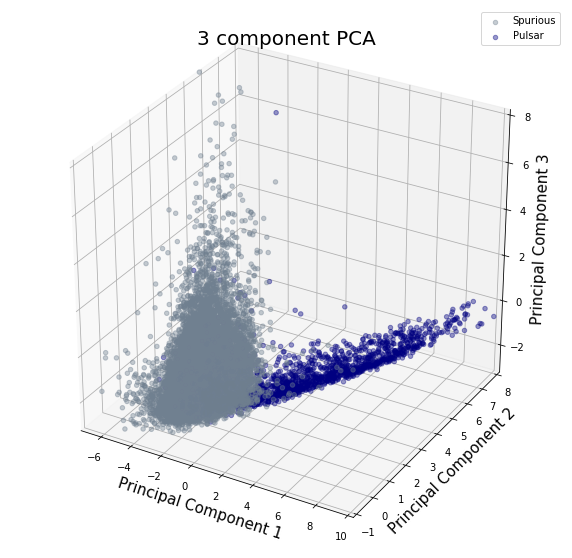

In [15]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3 component PCA', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

targets = [0, 1]
colours = ['slategrey', 'navy']

for target, colour in zip(targets, colours):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal_component_1'], 
               pca_df.loc[indicesToKeep, 'principal_component_2'],
               pca_df.loc[indicesToKeep, 'principal_component_3'],
               c = colour, 
               alpha = .4)

ax.set_xlim3d(-7,10)
ax.set_ylim3d(-1,8)
ax.set_zlim3d(-3,8)
ax.grid()
ax.legend(['Spurious', 'Pulsar'])
plt.savefig('images/3component-projection.png')